<a href="https://colab.research.google.com/github/saichandboyapati/vrsec-pytorch/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Libraries and Generate Non-Linear Data

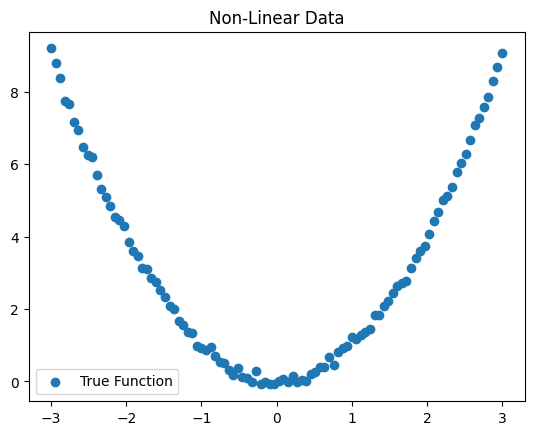

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Generate non-linear data (parabolic function)
torch.manual_seed(42)
X = torch.linspace(-3, 3, 100).reshape(-1, 1)
y = X**2 + 0.1 * torch.randn(X.shape)  # Quadratic function with noise

plt.scatter(X.numpy(), y.numpy(), label="True Function")
plt.legend()
plt.title("Non-Linear Data")
plt.show()

# 2.Define a Simple Linear Model (Underfitting)

In [12]:
class SimpleLinearModel(nn.Module):
    def __init__(self):
        super(SimpleLinearModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # Single-layer (too simple for non-linear data)

    def forward(self, x):
        return self.linear(x)

# Initialize model, loss function, and optimizer
model = SimpleLinearModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


3.Train the Model

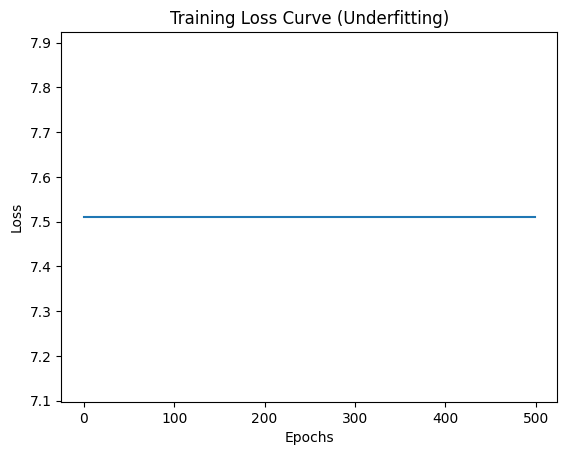

In [18]:
epochs = 500
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Plot loss
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve (Underfitting)")
plt.show()

4.Visualizing the Model’s Predictions

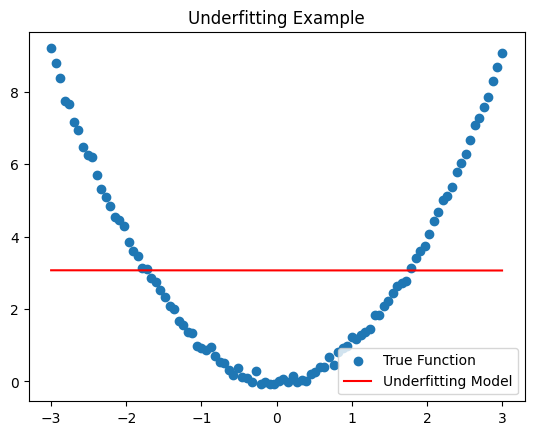

In [4]:
with torch.no_grad():
    y_pred = model(X)

plt.scatter(X.numpy(), y.numpy(), label="True Function")
plt.plot(X.numpy(), y_pred.numpy(), color='red', label="Underfitting Model")
plt.legend()
plt.title("Underfitting Example")
plt.show()

Define a complex Linear Model(Overfitting[link text](https://)

# Define a complex Linear Model(Overfitting)

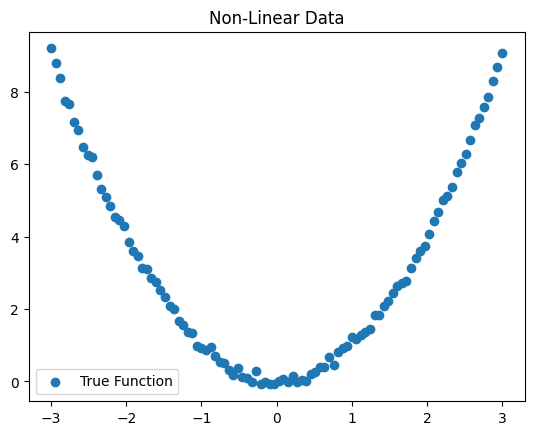

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Generate non-linear data (quadratic function)
torch.manual_seed(42)
X = torch.linspace(-3, 3, 100).reshape(-1, 1)
y = X**2 + 0.1 * torch.randn(X.shape)  # Quadratic function with noise

# Split into training and validation sets
X_train, y_train = X[:80], y[:80]   # 80% for training
X_val, y_val = X[80:], y[80:]       # 20% for validation

# Plot data
plt.scatter(X.numpy(), y.numpy(), label="True Function")
plt.legend()
plt.title("Non-Linear Data")
plt.show()

Train the Model (Observe Overfitting)

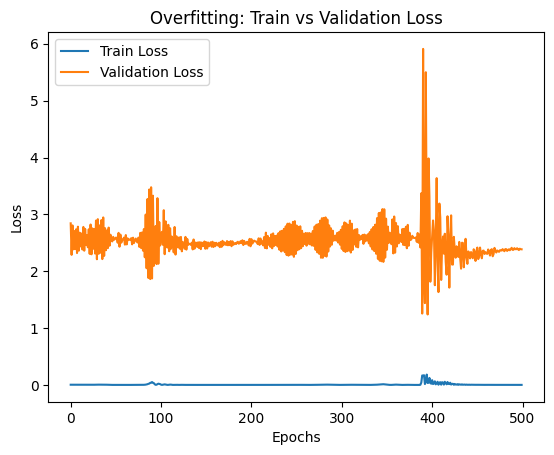

In [23]:
pochs = 1000
train_losses, val_losses = [], []

for epoch in range(epochs):
    # Training phase
    model.train()
    optimizer.zero_grad()
    y_train_pred = model(X_train)
    train_loss = criterion(y_train_pred, y_train)
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())

    # Validation phase
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_val)
        val_loss = criterion(y_val_pred, y_val)
        val_losses.append(val_loss.item())

# Plot training vs validation loss
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Overfitting: Train vs Validation Loss")
plt.show()

#Training loss keeps decreasing (model memorizes data).

#Validation loss increases after a point (poor generalization).

Visualizing Overfitting

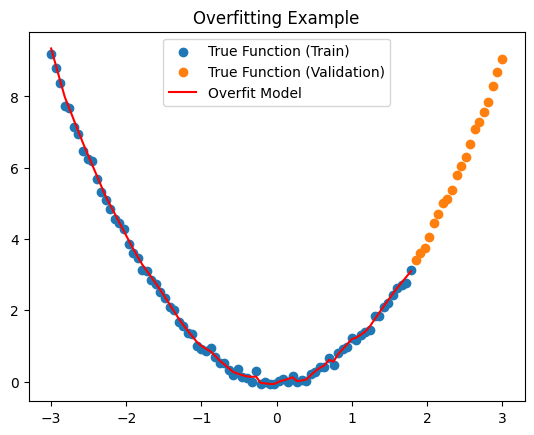

In [22]:
with torch.no_grad():
    y_train_pred = model(X_train)
    y_val_pred = model(X_val)

plt.scatter(X_train.numpy(), y_train.numpy(), label="True Function (Train)")
plt.scatter(X_val.numpy(), y_val.numpy(), label="True Function (Validation)")
plt.plot(X_train.numpy(), y_train_pred.numpy(), color='red', label="Overfit Model")
plt.legend()
plt.title("Overfitting Example")
plt.show()

#The model fits training data perfectly but fails on validation data.

#Early Stopping & LR Scheduling in PyTorch

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import StepLR

# Load dataset
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# Initialize model, loss, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
scheduler = StepLR(optimizer, step_size=5, gamma=0.5)  # Reduce LR every 5 epochs

# Training with early stopping
best_loss = float('inf')
patience = 3
counter = 0

for epoch in range(20):  # Max 20 epochs
    total_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    scheduler.step()  # Adjust learning rate
    print(f"Epoch {epoch+1}, Loss: {loss.item()}, LR: {scheduler.get_last_lr()}")

    # Early stopping logic
    if loss.item() < best_loss:
        best_loss = loss.item()
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered!")
            break

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.18MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 152kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.23MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.82MB/s]


Epoch 1, Loss: 0.32339099049568176, LR: [0.01]
Epoch 2, Loss: 0.12799547612667084, LR: [0.01]
Epoch 3, Loss: 0.10503554344177246, LR: [0.01]
Epoch 4, Loss: 0.021311068907380104, LR: [0.01]
Epoch 5, Loss: 0.02363227680325508, LR: [0.005]
Epoch 6, Loss: 0.0008890186436474323, LR: [0.005]
Epoch 7, Loss: 0.011351929977536201, LR: [0.005]
Epoch 8, Loss: 0.006243093870580196, LR: [0.005]
Epoch 9, Loss: 0.17456382513046265, LR: [0.005]
Early stopping triggered!
